In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datetime import datetime
import pickle

# DATASET LINK: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv(r"E:\2_internship with Codsoft\5_credit_card_fraud_project\creditcard.csv")

In [3]:
#Checking Missing Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
value_counts = df['Class'].value_counts()
print(value_counts)

0    284315
1       492
Name: Class, dtype: int64


492 is fraud transactions
284315 is not fraud transactions

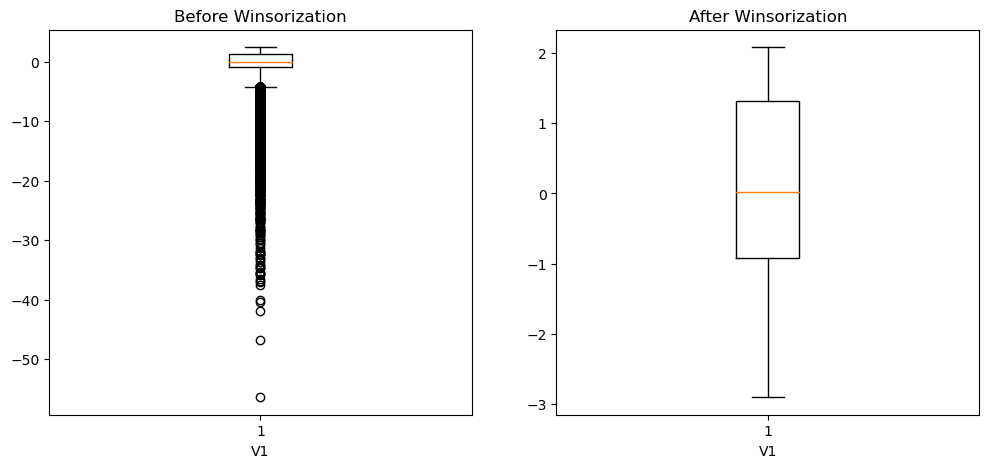

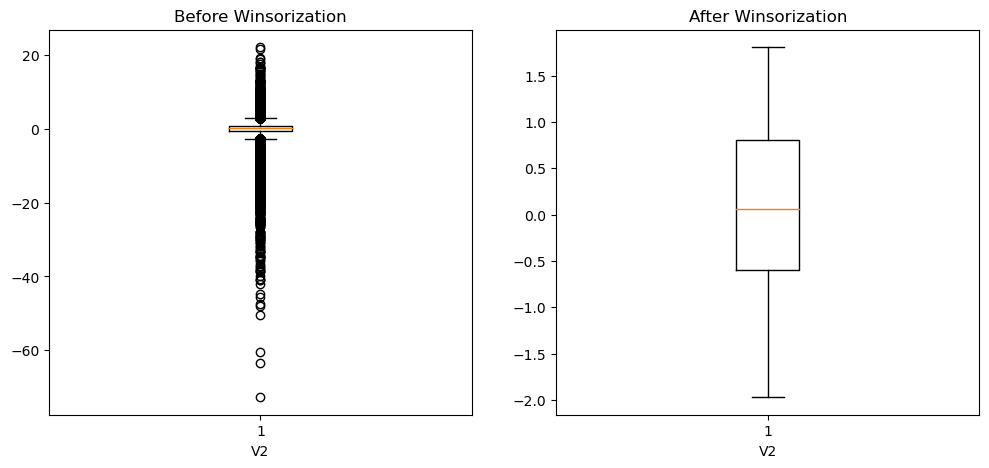

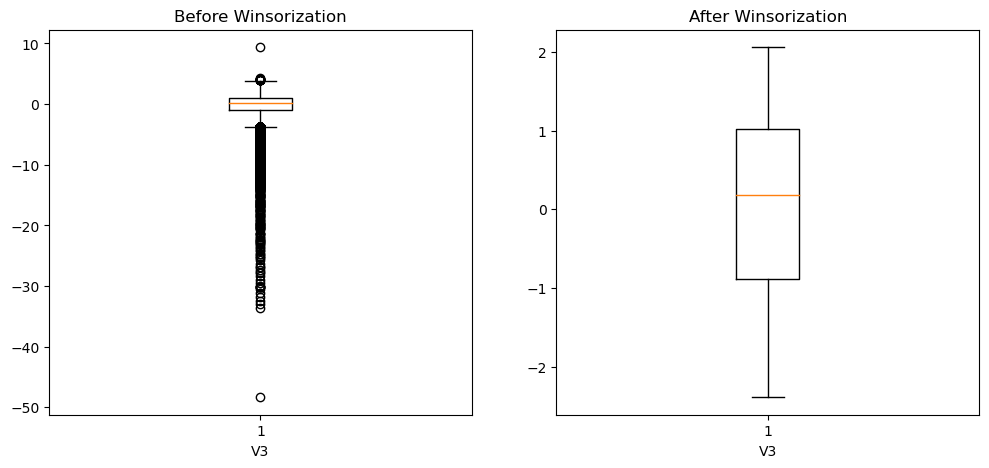

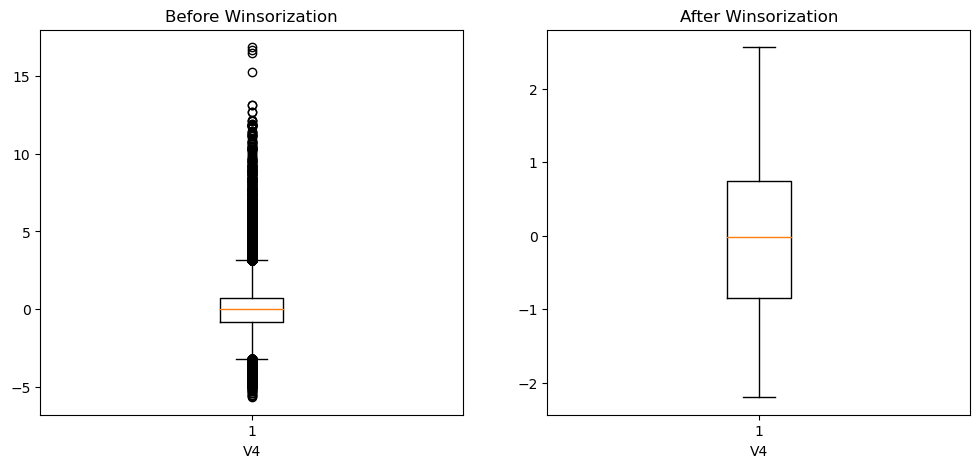

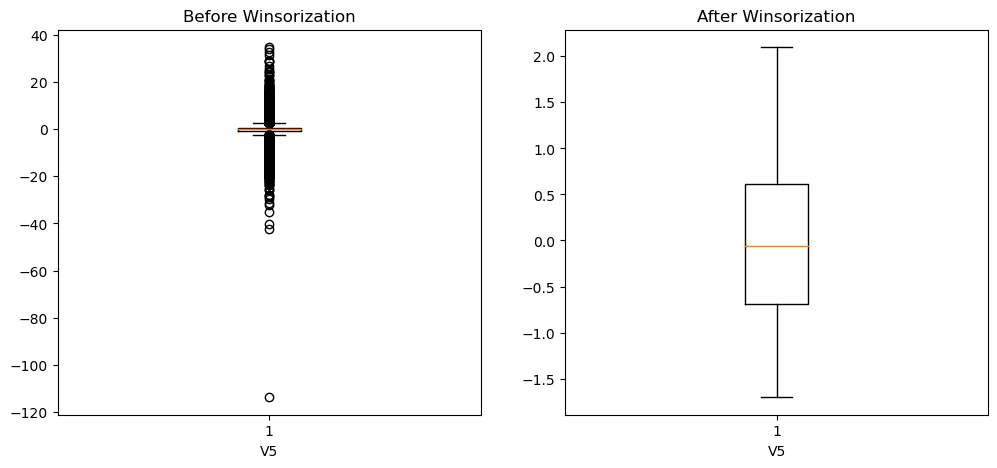

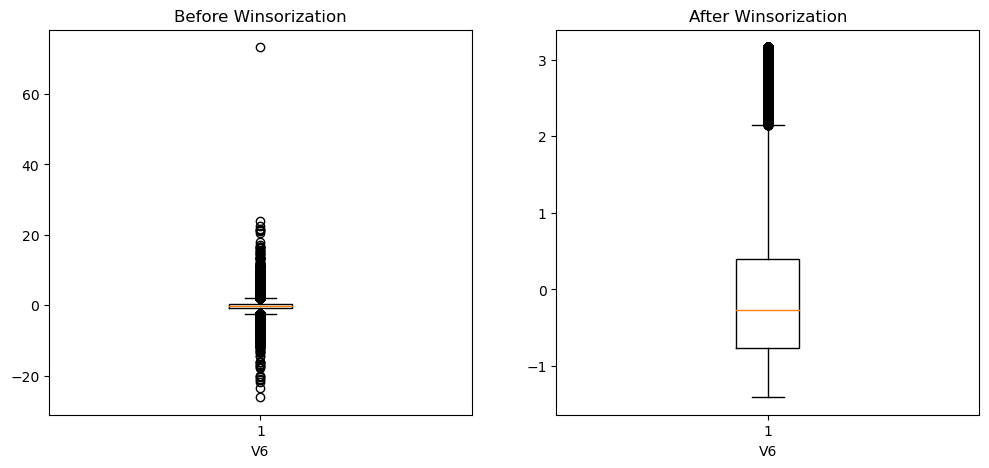

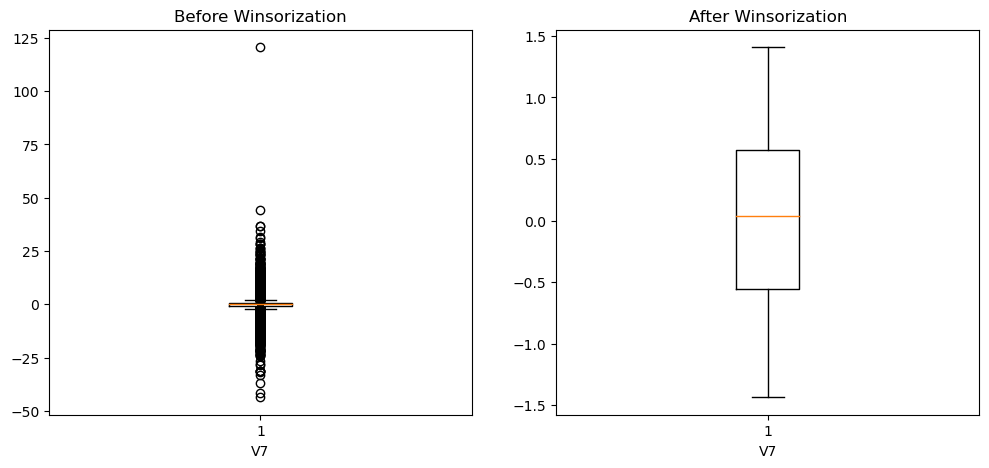

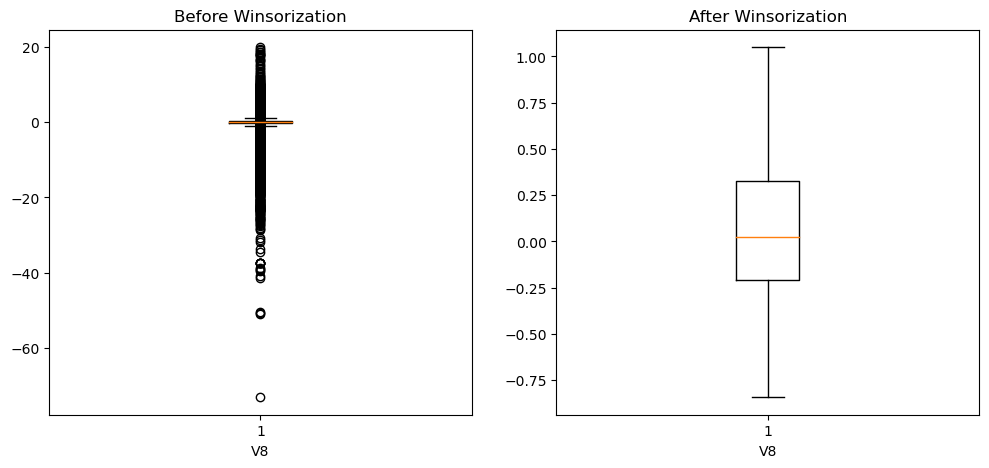

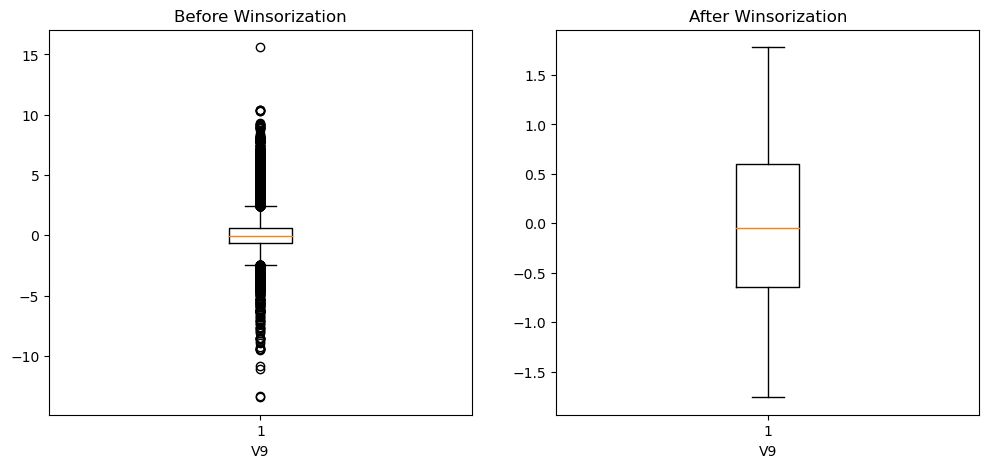

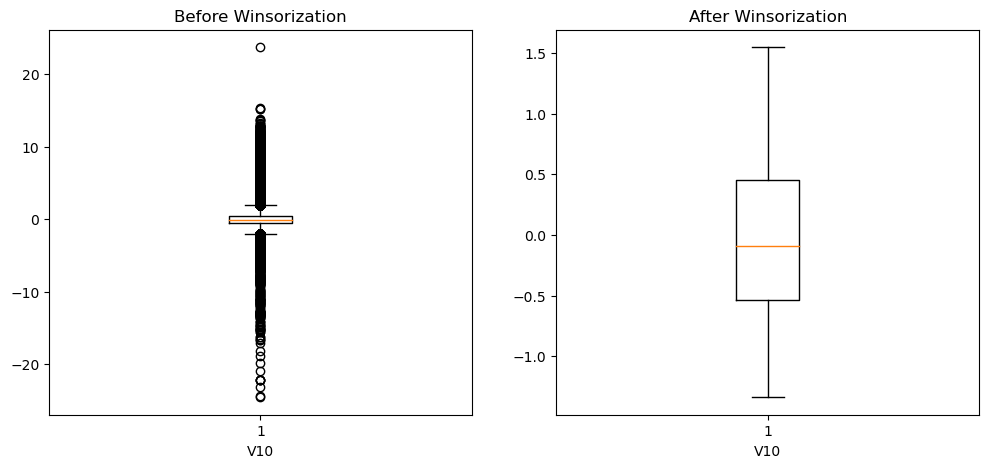

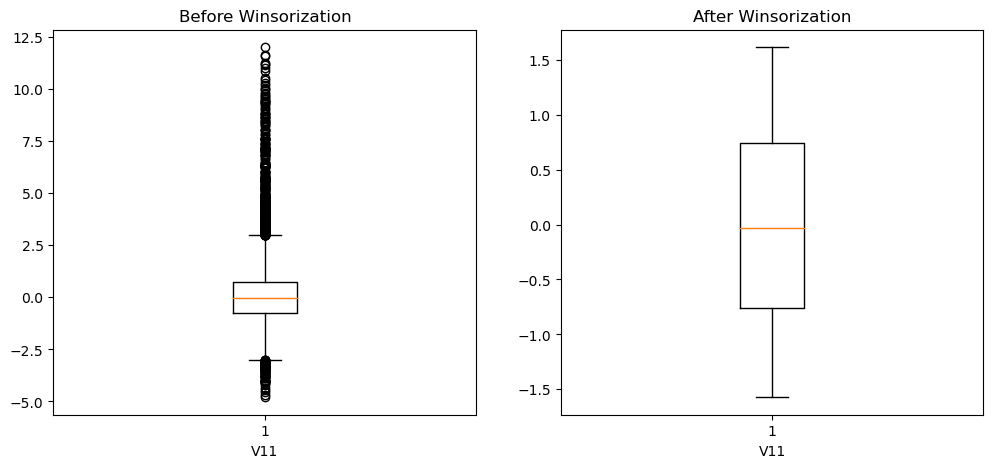

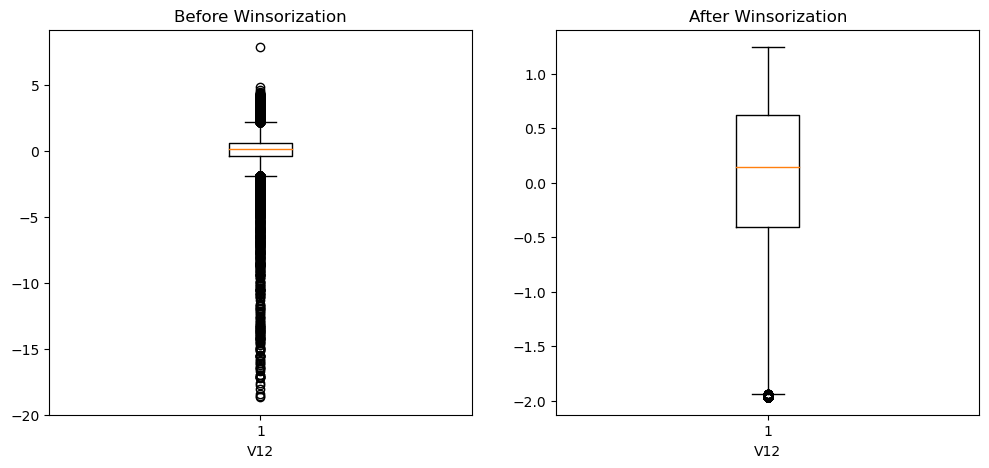

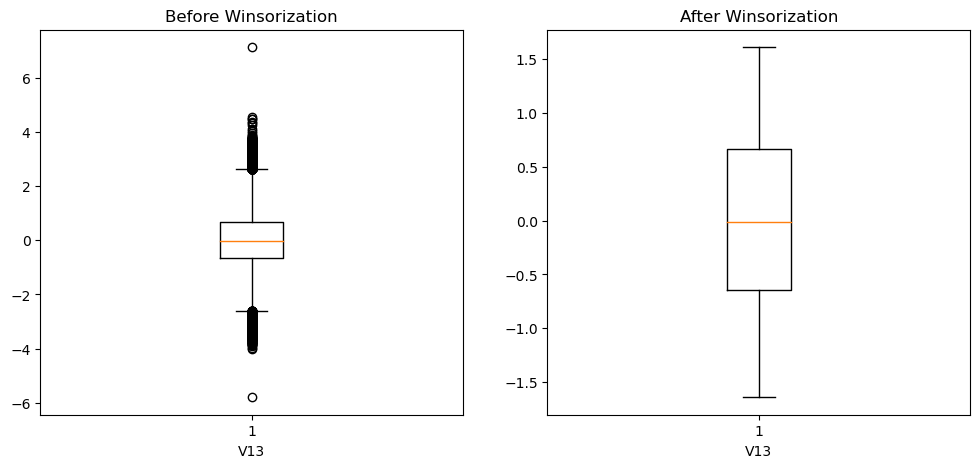

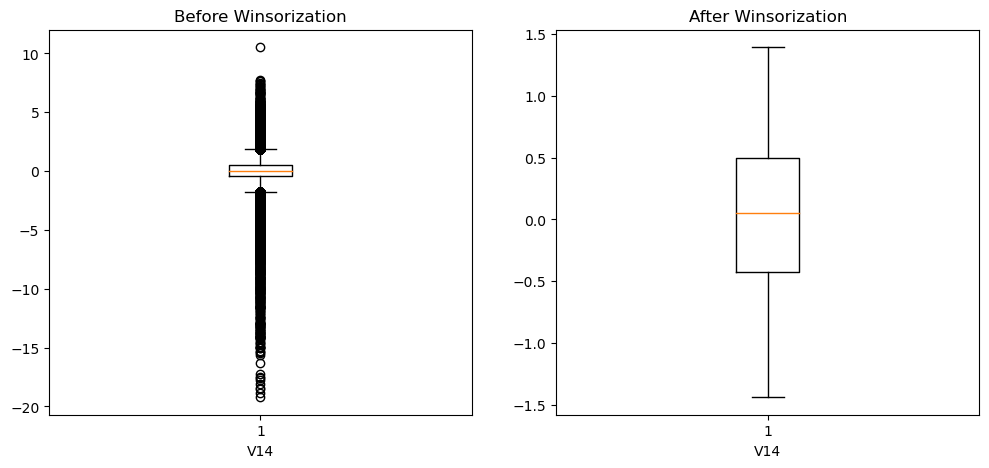

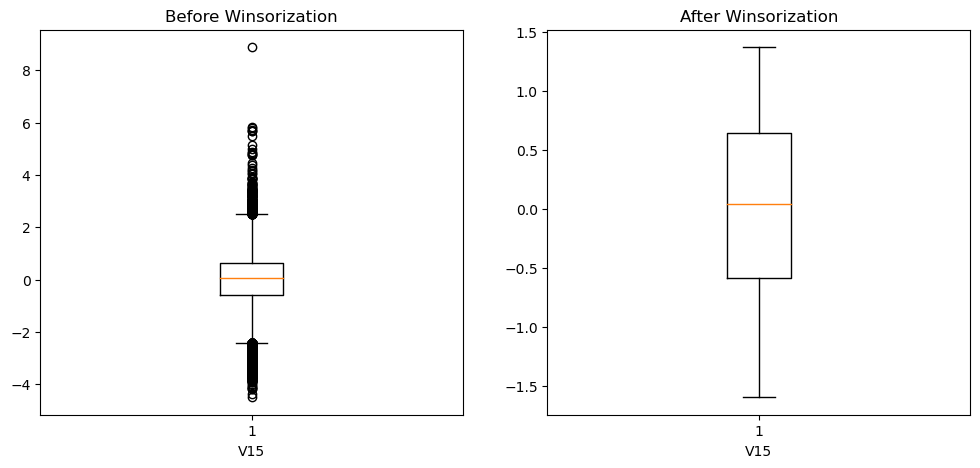

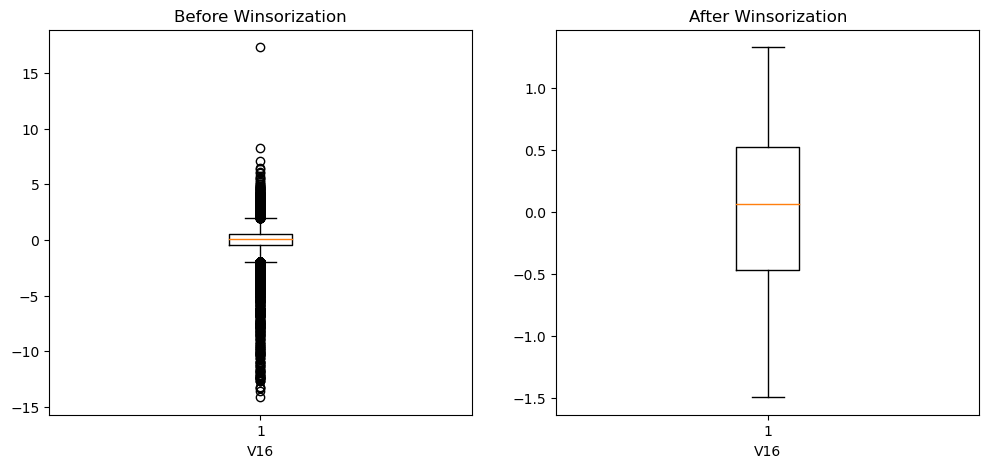

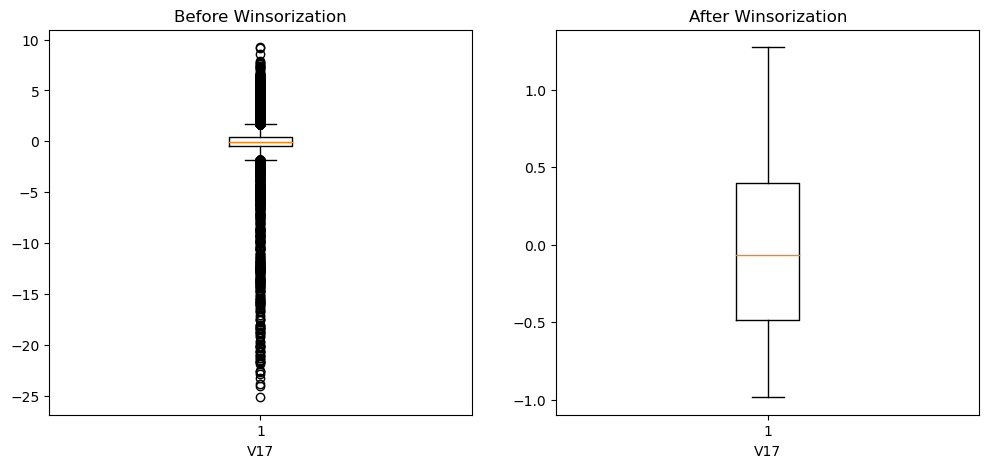

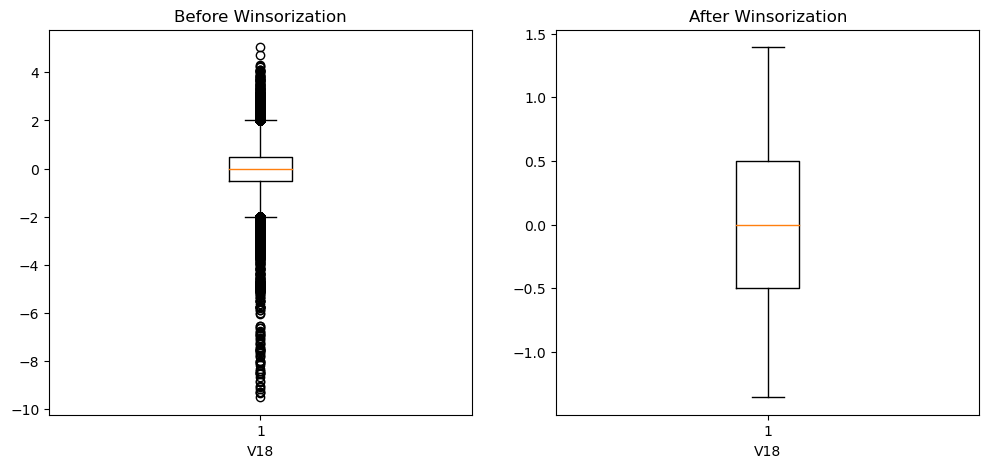

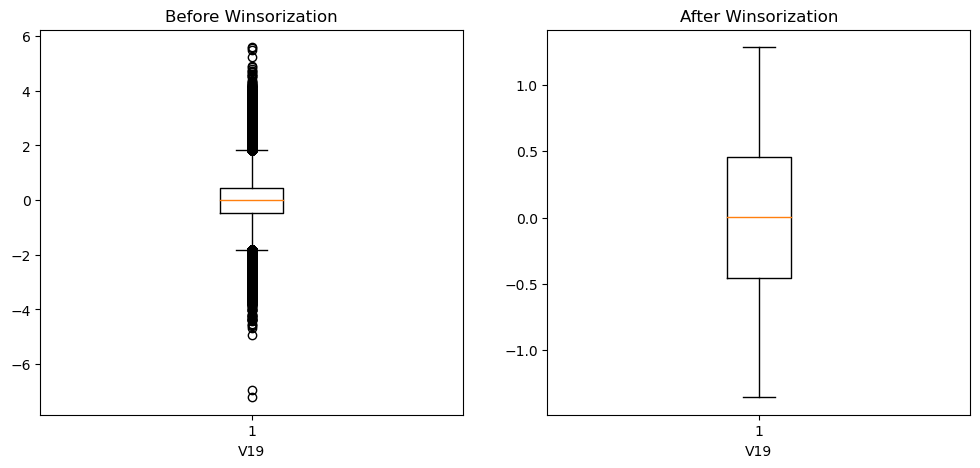

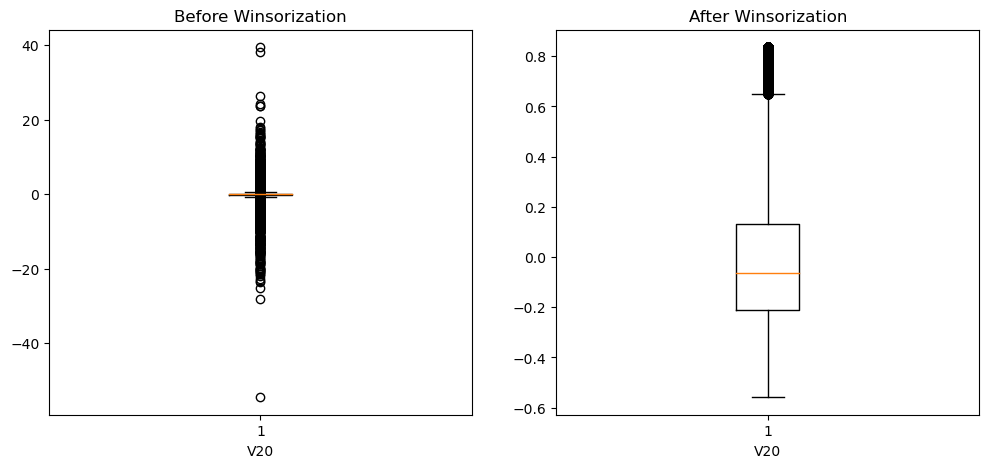

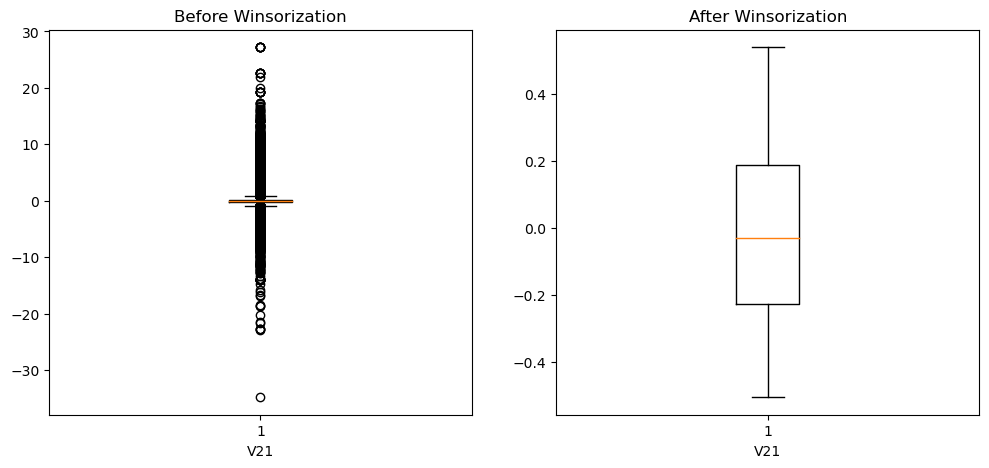

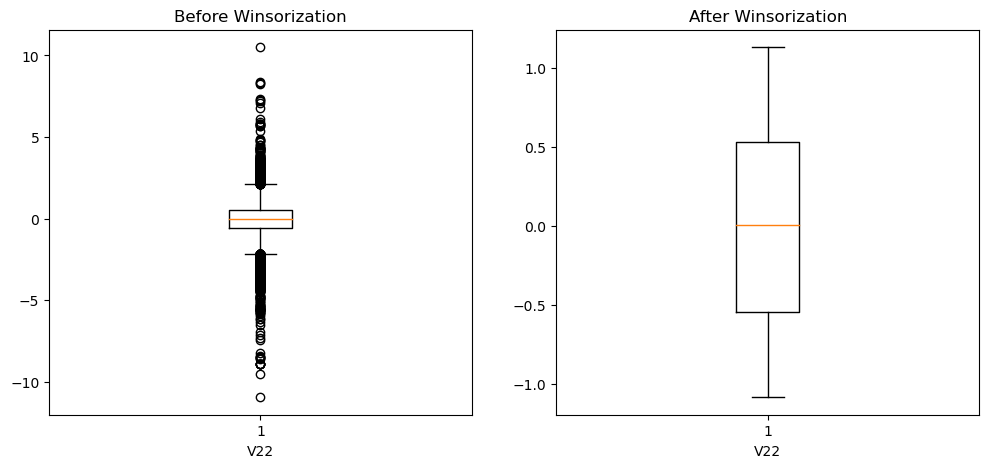

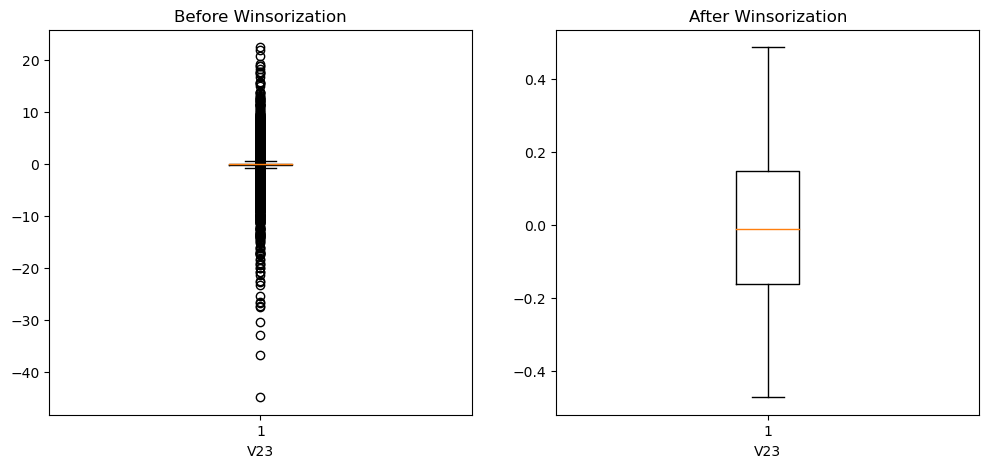

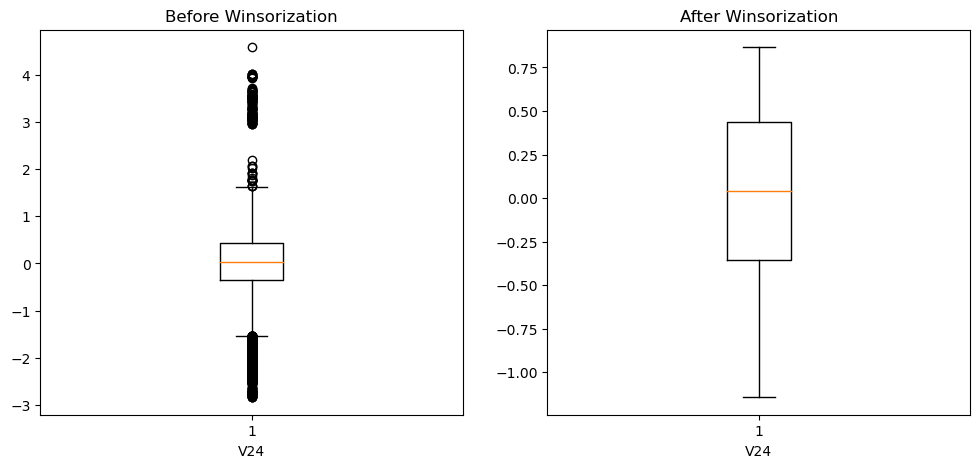

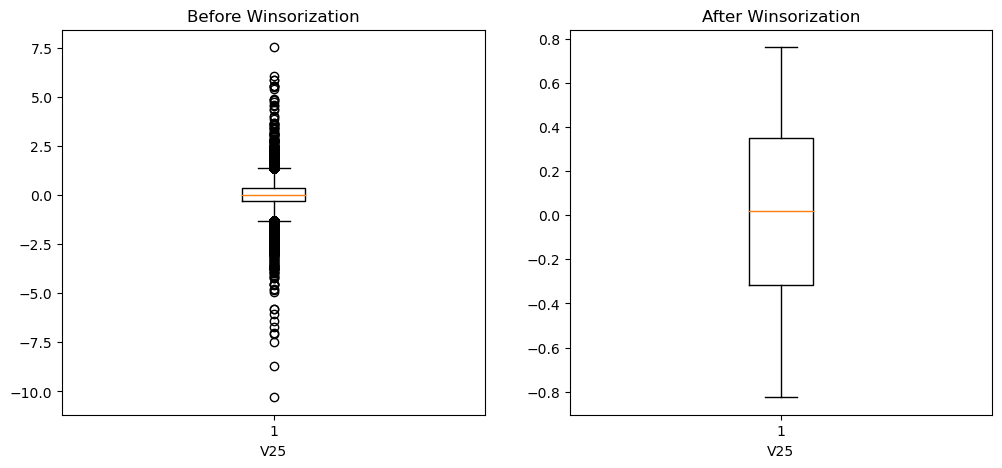

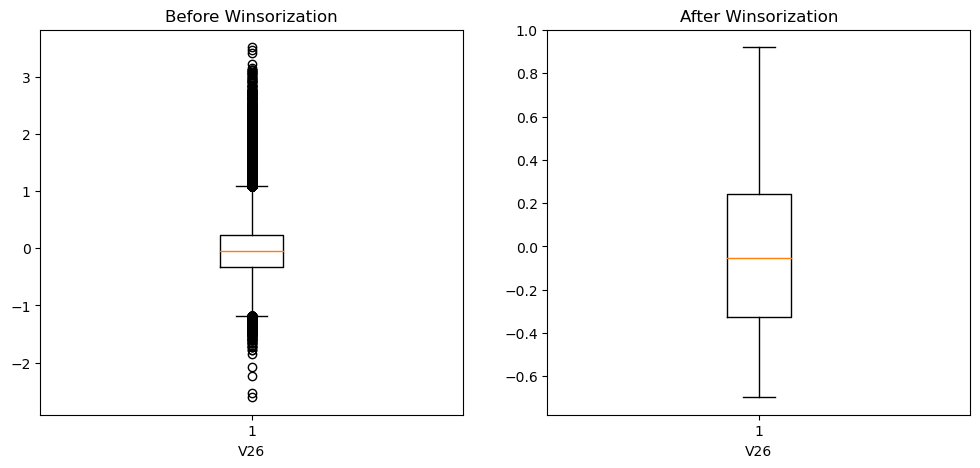

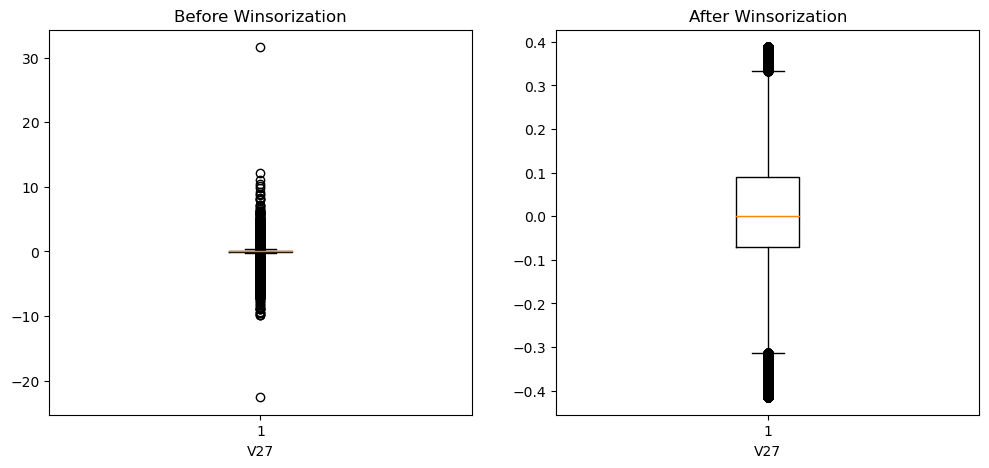

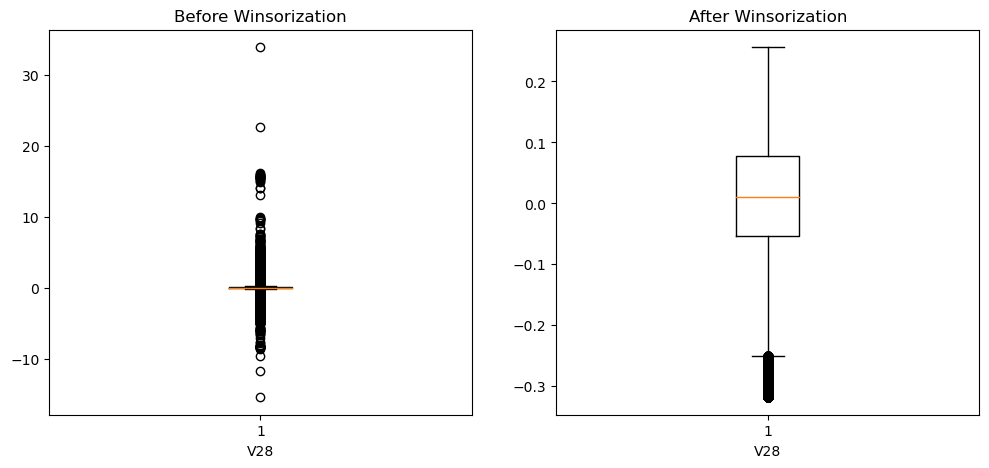

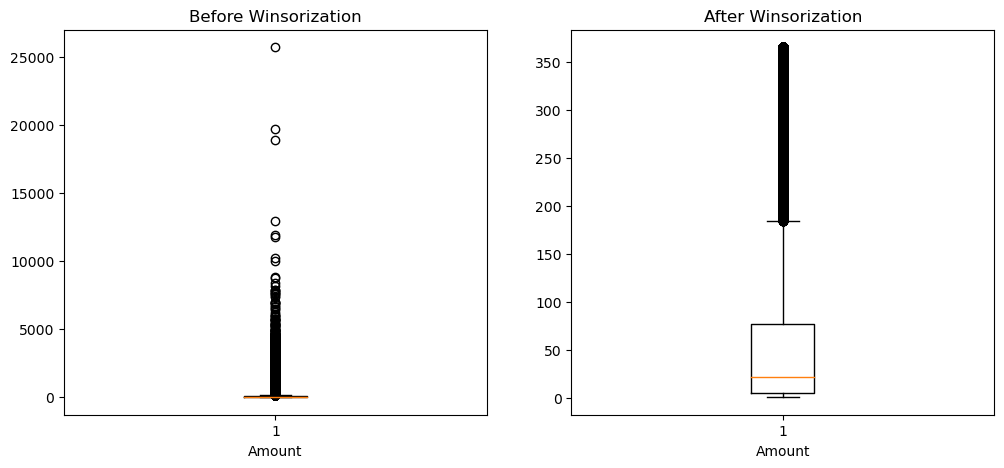

In [7]:
for col in cols:
    # Boxplot Before Winsorization
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel(col)
    plt.boxplot(df[col])
    plt.title('Before Winsorization')
    
    # Boxplot After Winsorization
    winsor = Winsorizer(capping_method = 'quantiles',
                        tail = 'both',
                        fold = 0.05)
    winsor_df[col] = winsor.fit_transform(df[[col]])
    
    plt.subplot(1, 2, 2)
    plt.xlabel(col)
    plt.boxplot(winsor_df[col])
    plt.title('After Winsorization')
    plt.show()

still there is outliers exist in 'V6','V20','V27','V28','Amount'

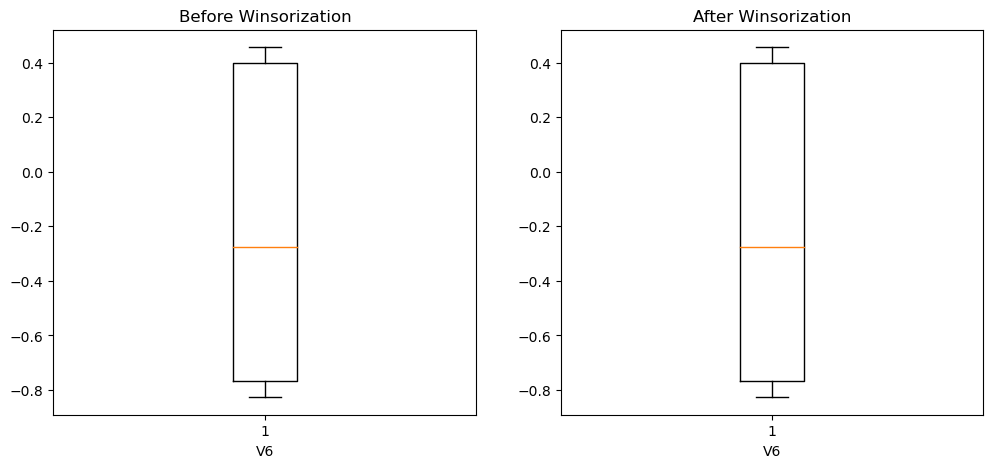

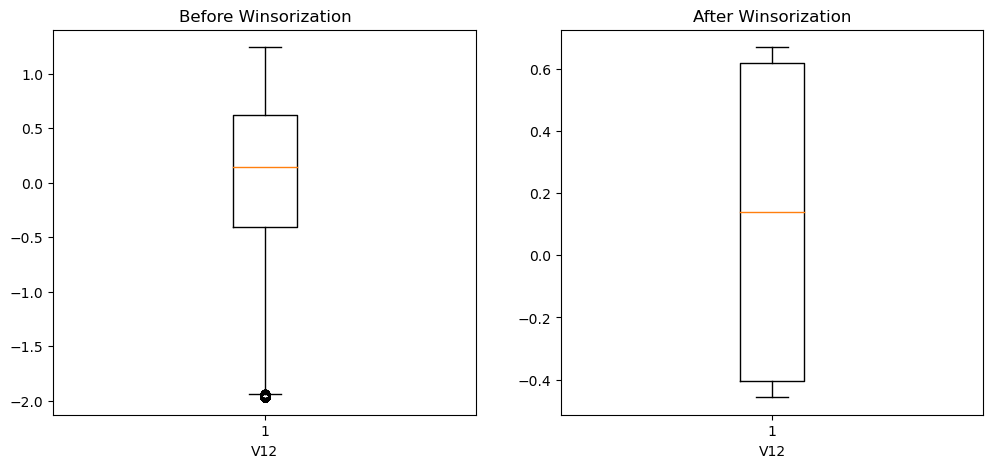

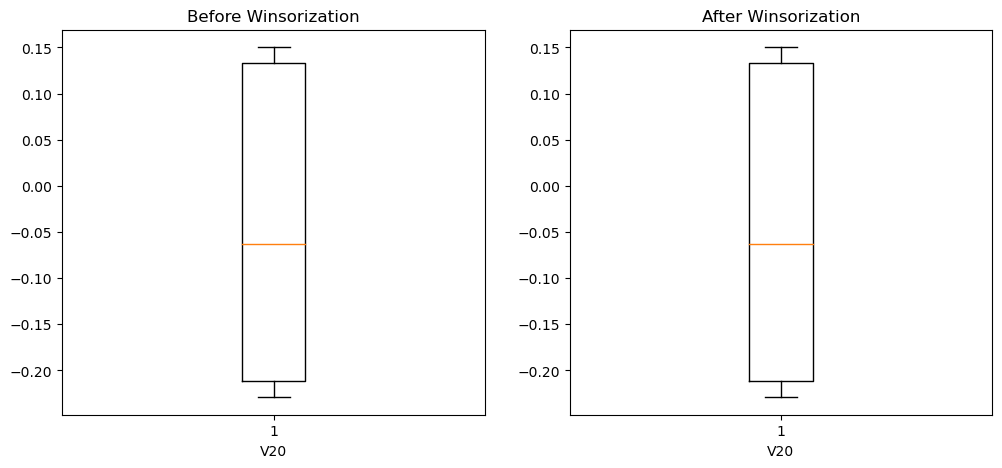

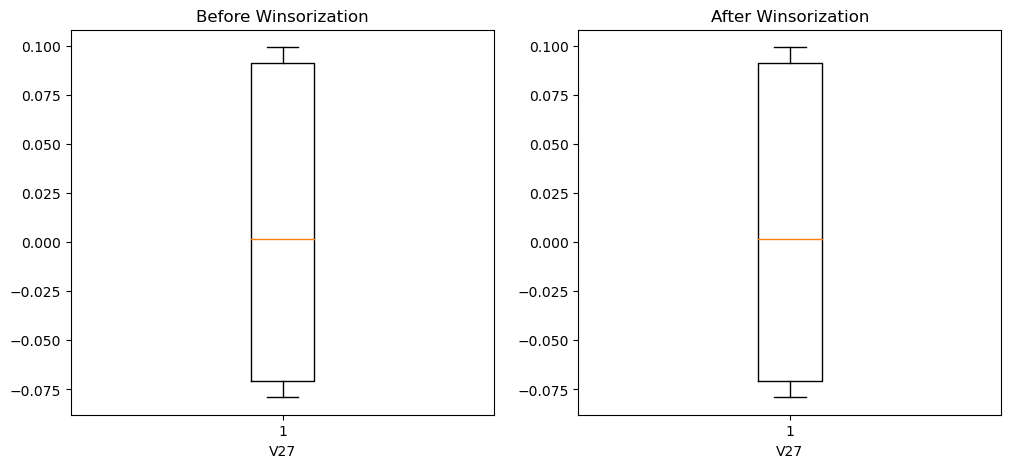

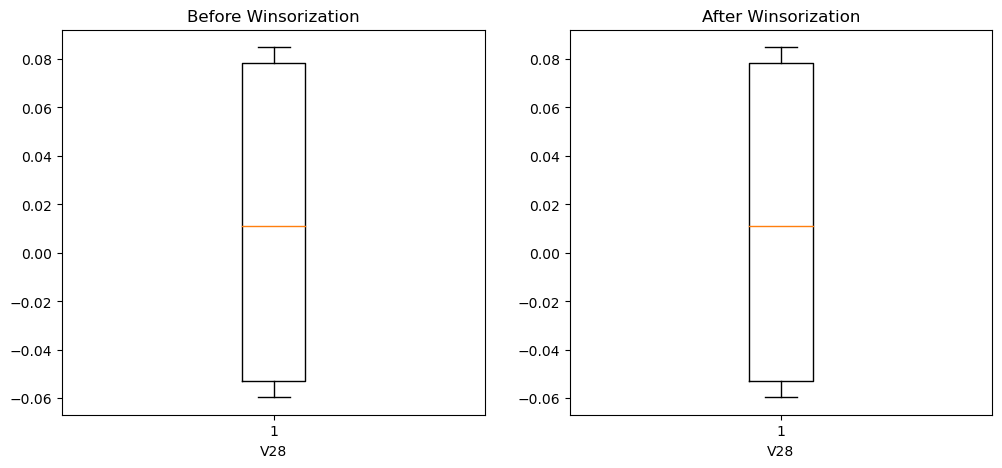

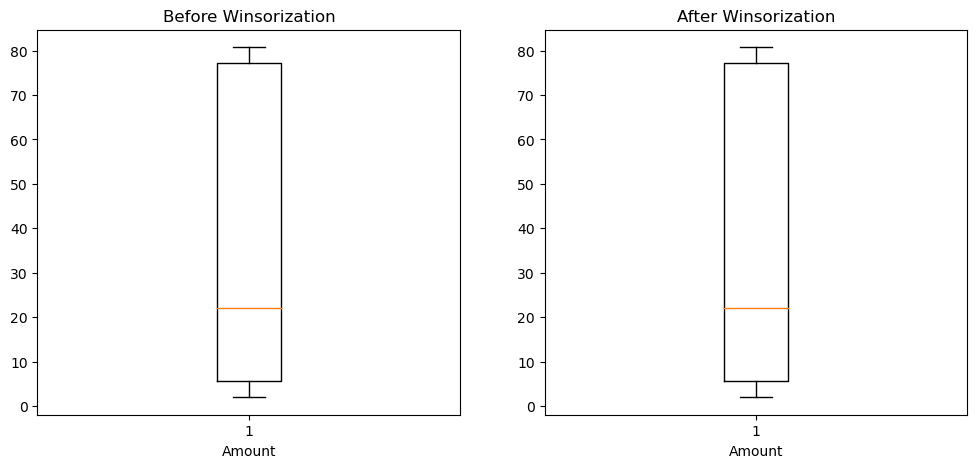

In [10]:
for col in ['V6','V12','V20','V27','V28','Amount']:
    # Boxplot Before Winsorization
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel(col)
    plt.boxplot(winsor_df[col])
    plt.title('Before Winsorization')
    
    # Boxplot After Winsorization
    winsor = Winsorizer(capping_method = 'iqr',
                        tail = 'both',
                        fold = 0.05)
    winsor_df[col] = winsor.fit_transform(df[[col]])
    
    plt.subplot(1, 2, 2)
    plt.xlabel(col)
    plt.boxplot(winsor_df[col])
    plt.title('After Winsorization')
    plt.show()

all outliers adjusted

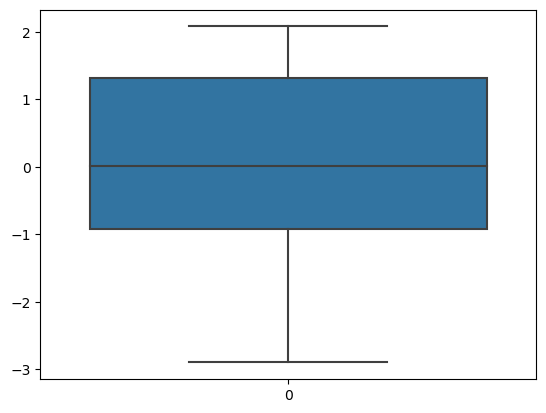

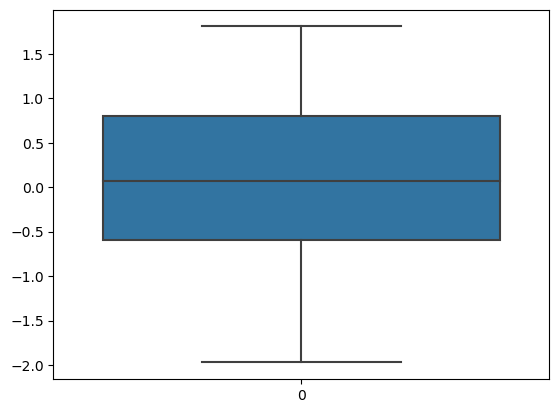

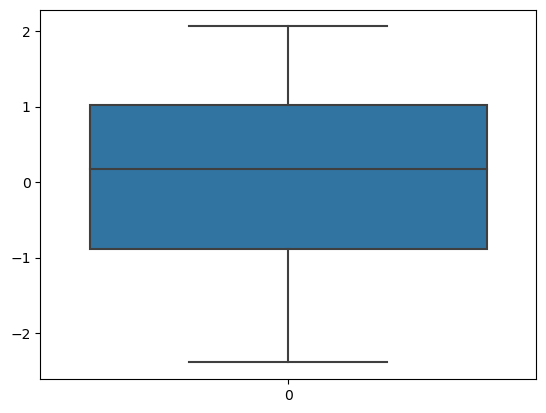

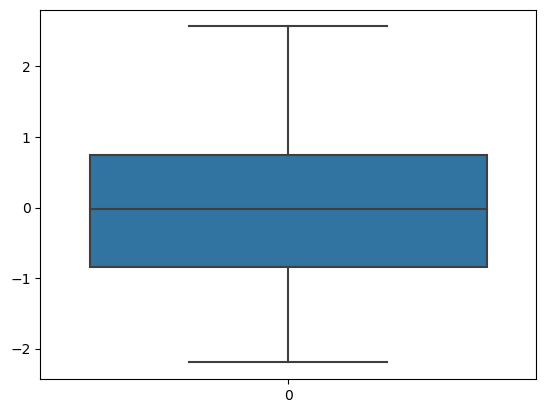

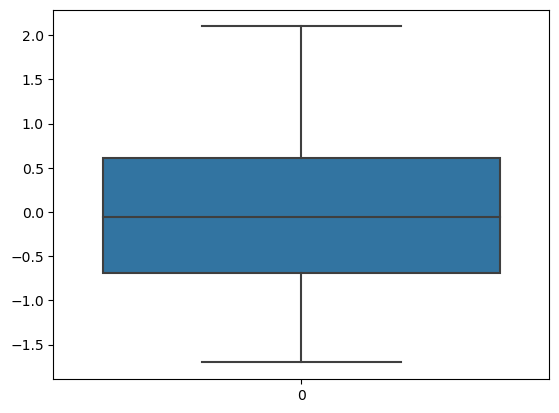

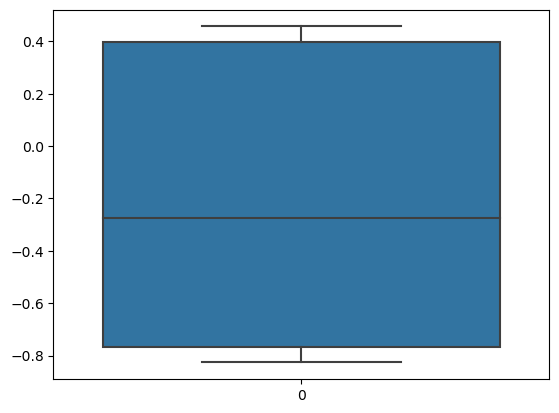

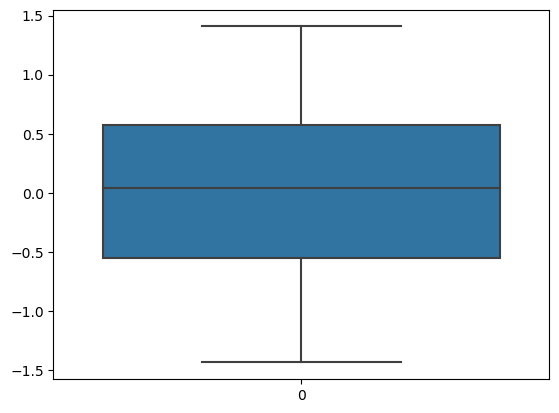

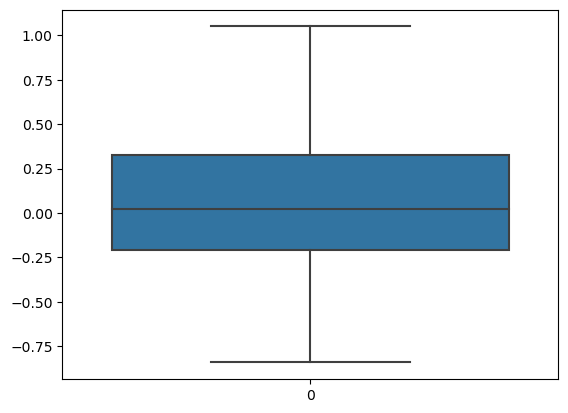

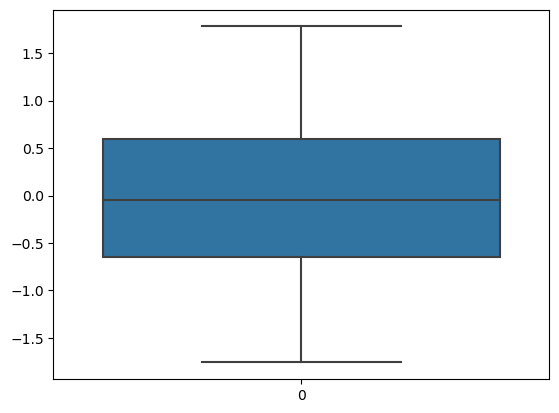

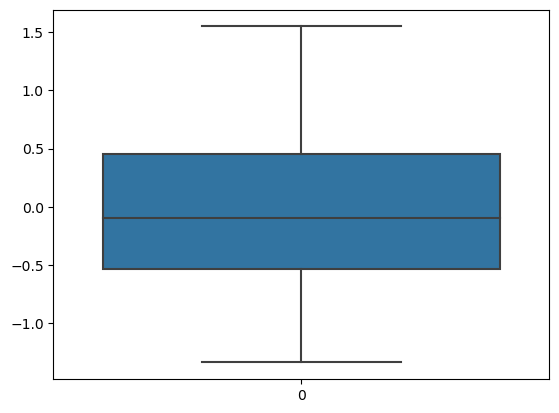

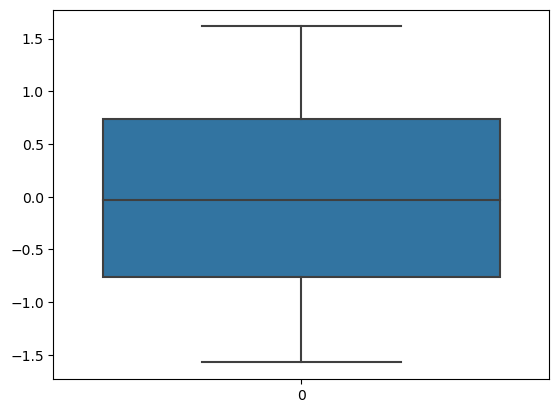

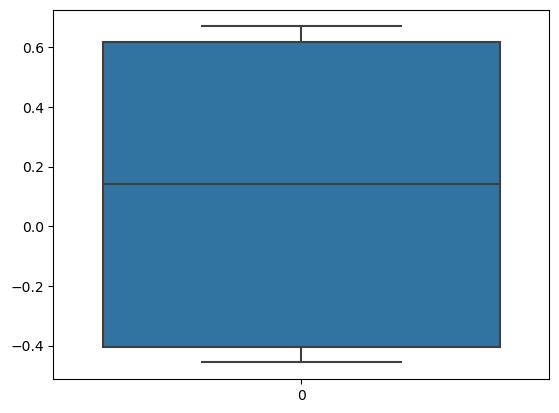

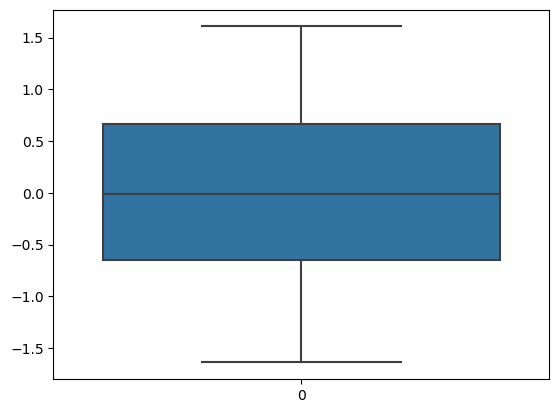

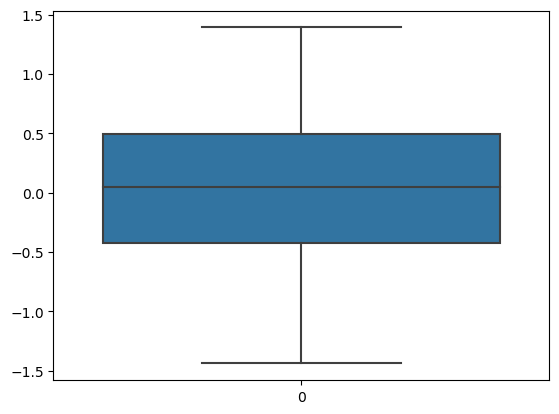

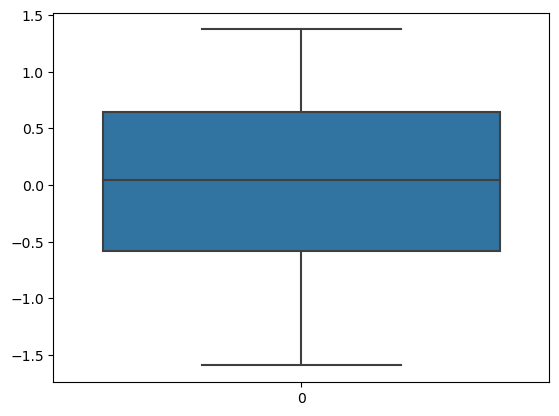

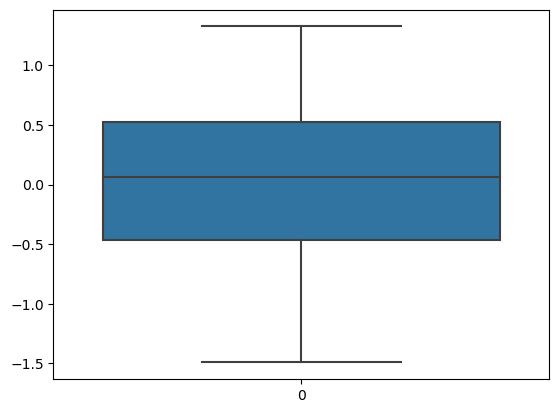

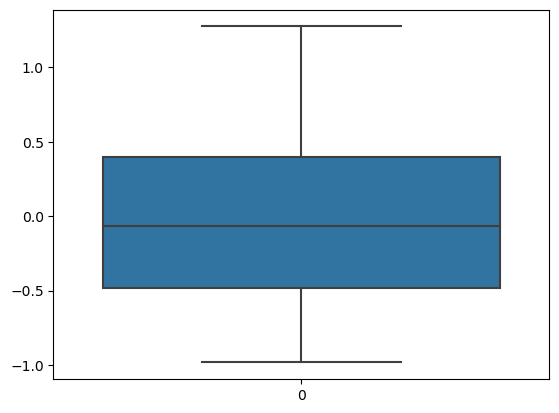

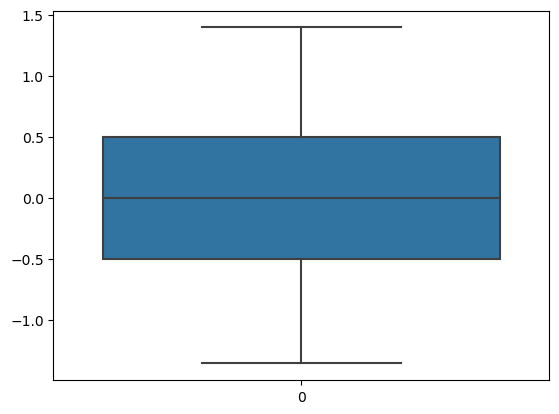

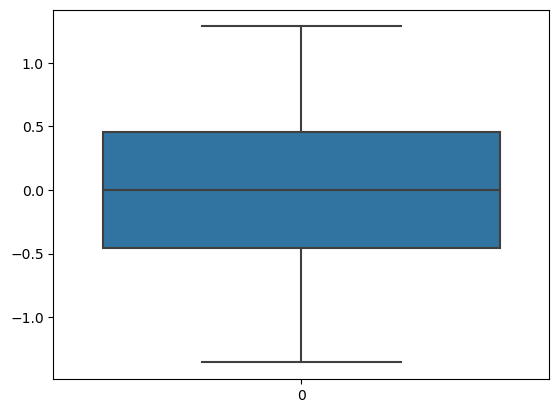

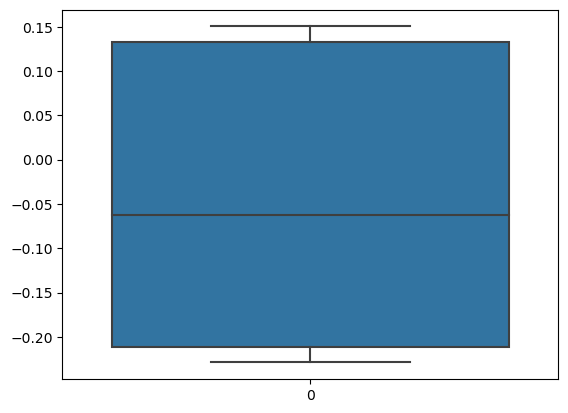

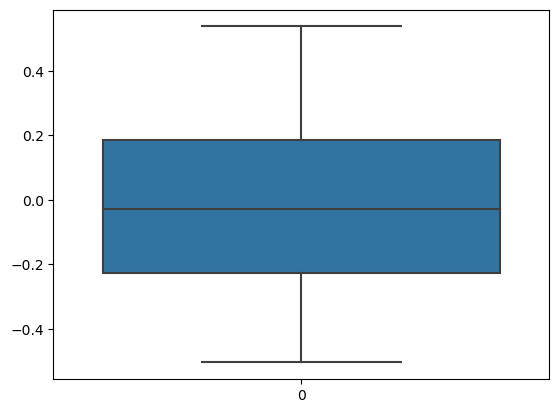

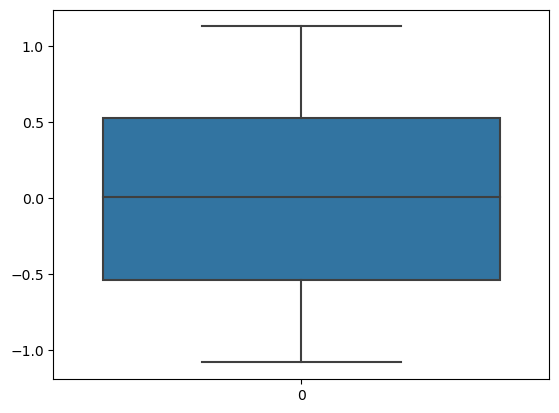

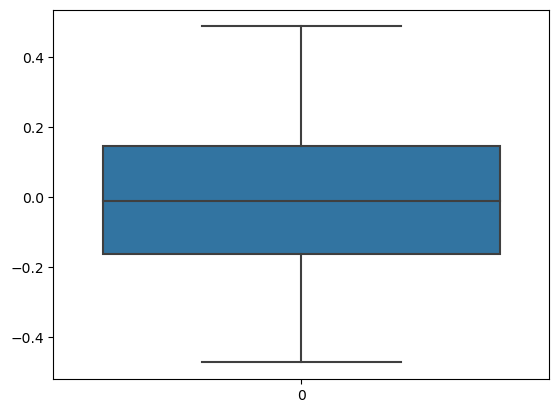

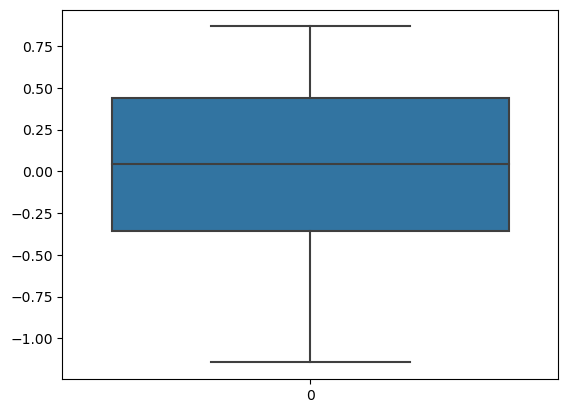

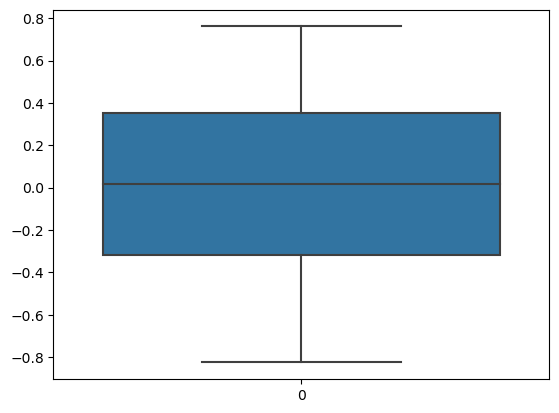

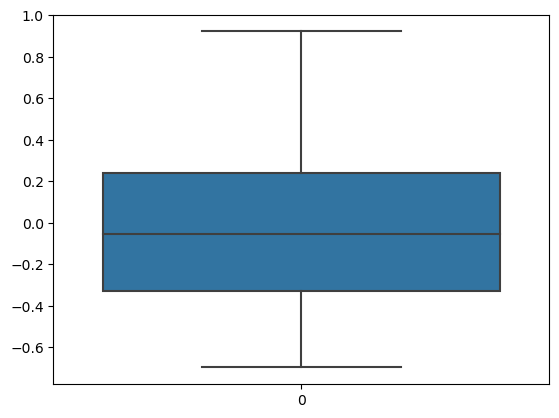

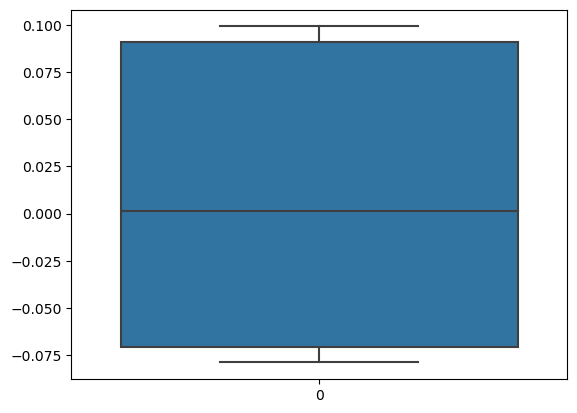

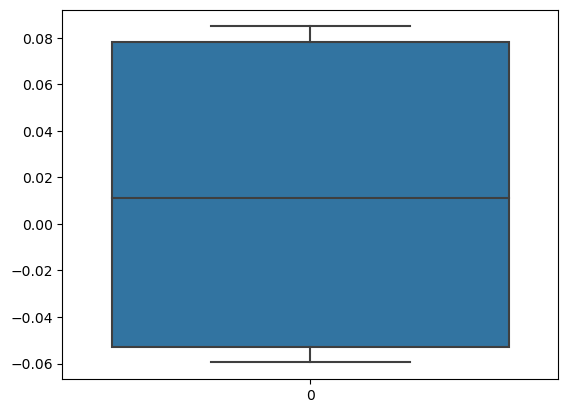

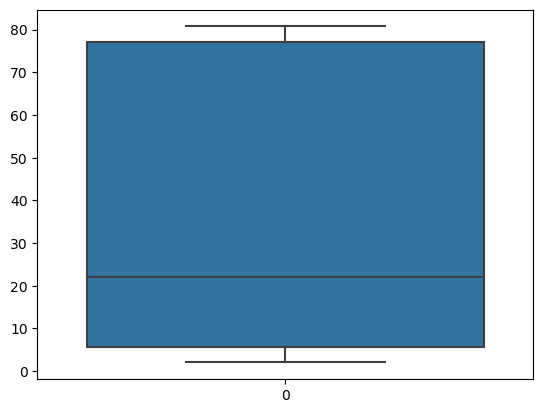

In [11]:
# Box Plot
for col in cols:
    sns.boxplot(winsor_df[col])
    plt.show()    

In [12]:
X = pd.concat([df['Time'], winsor_df], axis=1)
y = df['Class']

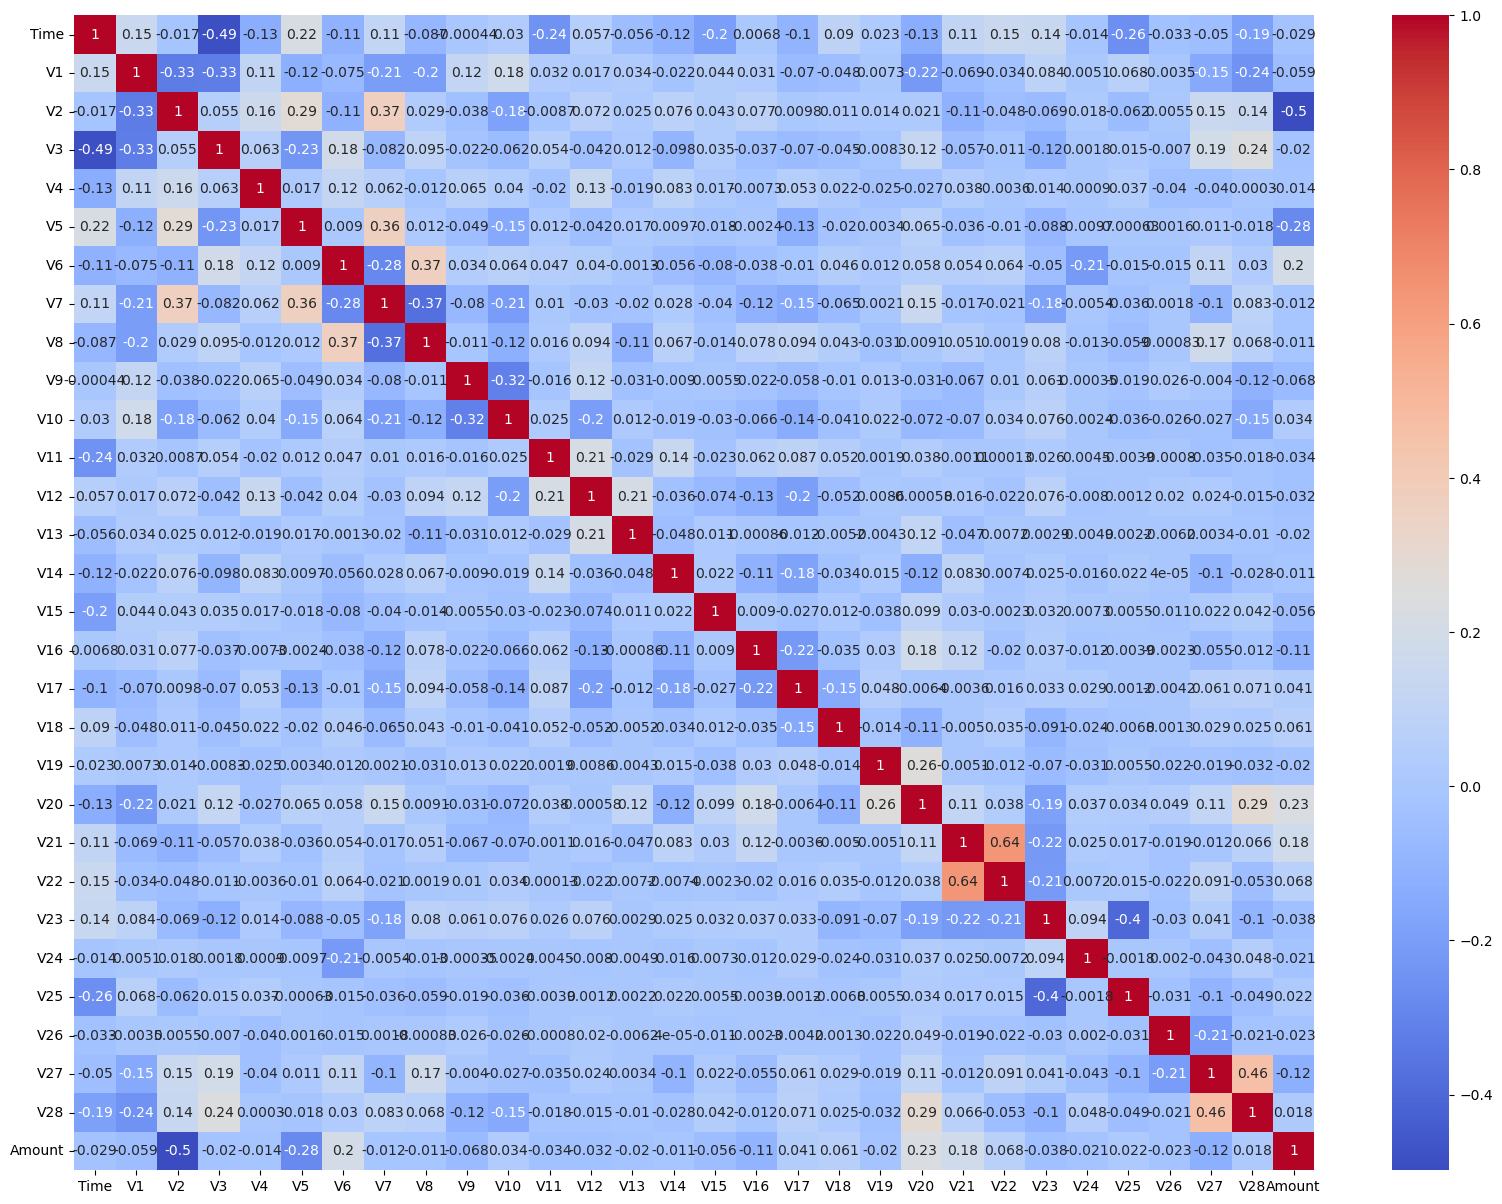

In [13]:
# Heatmap for correlation matrix
plt.figure(figsize= (20,15))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# Define Models
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost Classifier': XGBClassifier(),
    'Support Vector Classifier': SVC(kernel='rbf')
}

In [16]:
# Iterate over models and evaluate them
for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate the model
    train_auc = metrics.roc_auc_score(y_train, y_pred_train)
    test_auc = metrics.roc_auc_score(y_test, y_pred_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    class_report = classification_report(y_test, y_pred_test)
    
    # Print the evaluation metrics
    print(f'{name} - Training AUC: {train_auc:.4f}')
    print(f'{name} - Validation AUC: {test_auc:.4f}')
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("############################################################\n")
    
    # Save the model using pickle
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'{name.replace(" ", "_")}_{timestamp}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f'Model {name} saved as {filename}')

Training Logistic Regression...


C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training AUC: 0.8386
Logistic Regression - Validation AUC: 0.8365
Accuracy: 0.9989

Confusion Matrix:
 [[56836    28]
 [   32    66]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.67      0.69        98

    accuracy                           1.00     56962
   macro avg       0.85      0.84      0.84     56962
weighted avg       1.00      1.00      1.00     56962

############################################################

Model Logistic Regression saved as Logistic_Regression_20240910_125422.pkl
Training XGBoost Classifier...
XGBoost Classifier - Training AUC: 1.0000
XGBoost Classifier - Validation AUC: 0.8928
Accuracy: 0.9996

Confusion Matrix:
 [[56860     4]
 [   21    77]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79   

C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
print("Model training and evaluation completed.")

Model training and evaluation completed.
